In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,10)
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')
pd.isnull(train).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
len(df)
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
clean_df = df.dropna(how='all')
len(clean_df)
clean_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


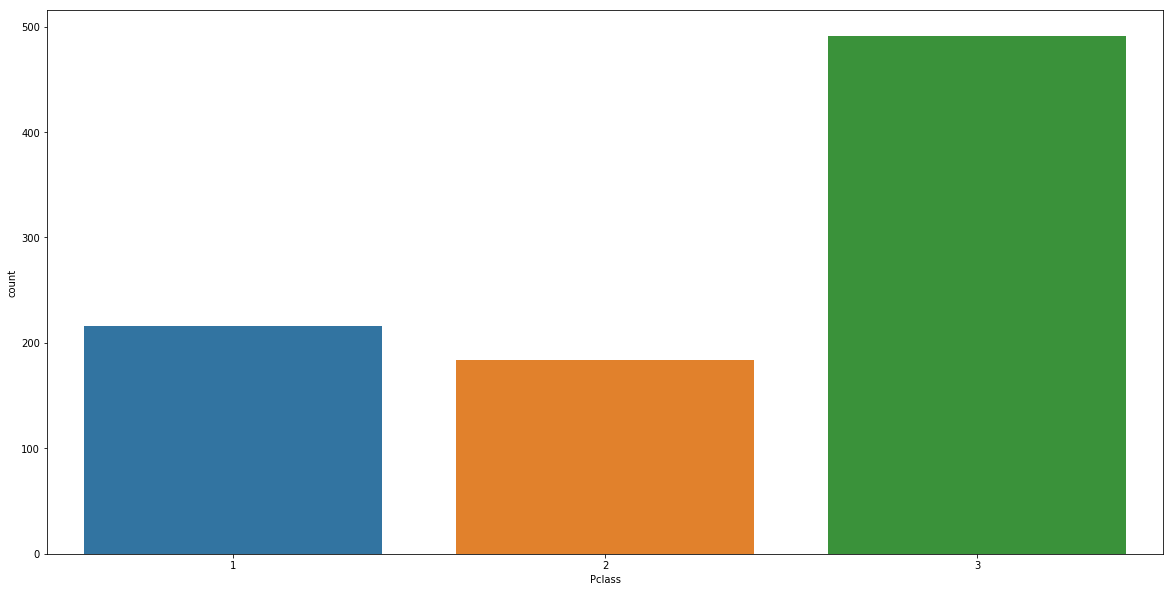

In [89]:
sns.countplot(x=clean_df['Pclass'])

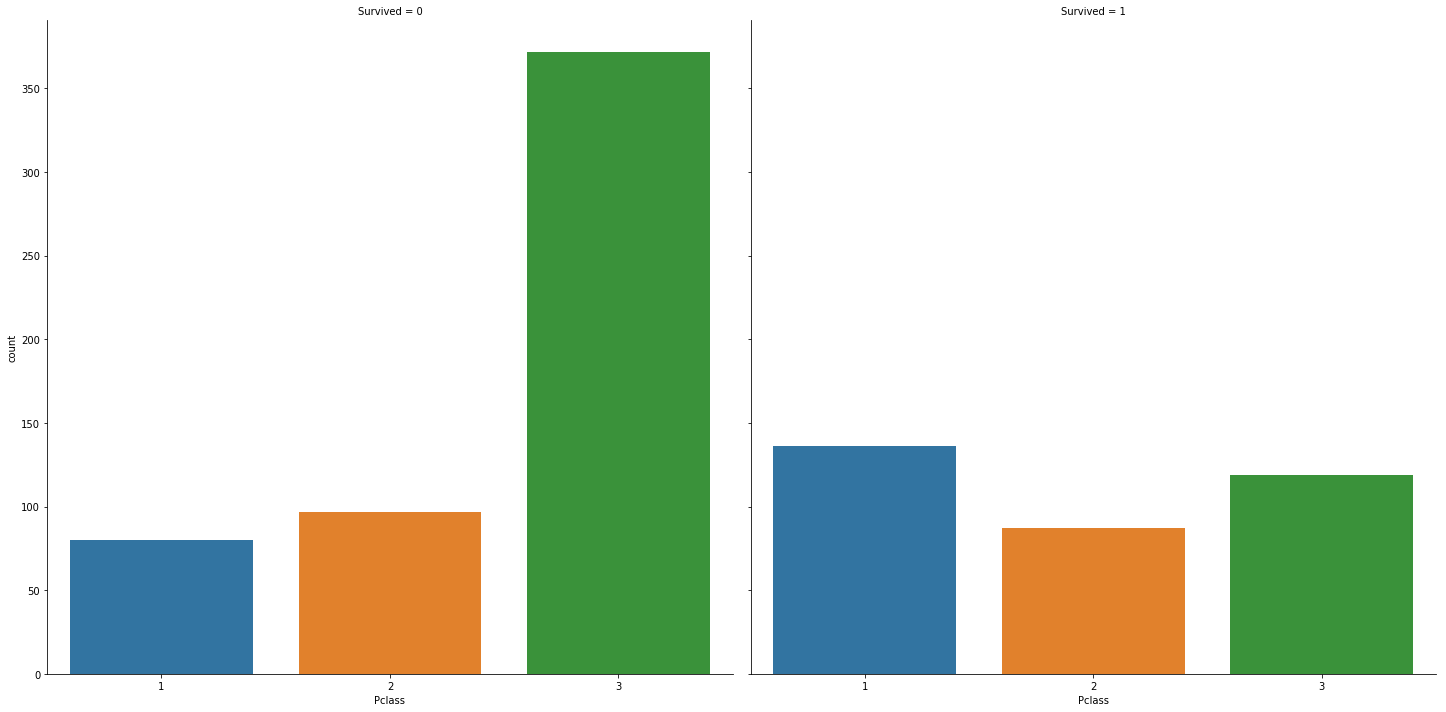

In [90]:
first_class = clean_df['Pclass'] == 1 #and clean_df['Survived'] == 1
second_class = clean_df['Pclass'] == 2
third_class = clean_df['Pclass'] == 3
Survived = clean_df['Survived'] == 1
# Survived & first_class
# sns.countplot(x="Survived & first class", data=Survived & first_class)
sns.factorplot(x='Pclass', col="Survived", data=clean_df, kind="count", size=10)

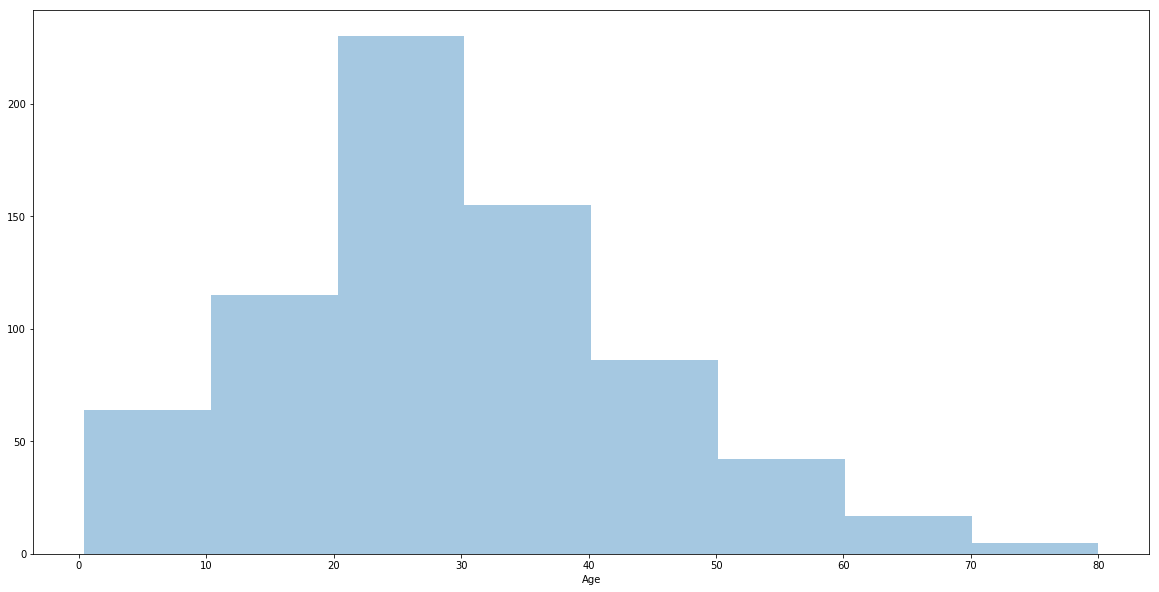

In [91]:
clean_Age = clean_df['Age'].dropna()
sns.distplot(a=clean_Age, kde=False, bins=8)

In [141]:
# age_categories = []
# age_categories.append((clean_df['Age'] > 0) & (clean_df['Age'] < 10) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 10) & (clean_df['Age'] < 20) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 20) & (clean_df['Age'] < 30) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 30) & (clean_df['Age'] < 40) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 40) & (clean_df['Age'] < 50) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 50) & (clean_df['Age'] < 60) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 60) & (clean_df['Age'] < 70) & (clean_df['Survived'] == 1))
# age_categories.append((clean_df['Age'] > 70) & (clean_df['Age'] <= 80) & (clean_df['Survived'] == 1))
# age_categories
# (clean_df['Age'] > 0.0) & (clean_df['Age'] < 10.0)
# sns.countplot(x=age_categories)

def calculate_age_category(df):
    df.loc[(df['Age'] <= 10) & (df['Age'] > 0), 'Age Categories'] = '0-10'
    df.loc[(df['Age'] <= 20) & (df['Age'] > 10), 'Age Categories'] = '10-20'
    df.loc[(df['Age'] <= 30) & (df['Age'] > 20), 'Age Categories'] = '20-30'
    df.loc[(df['Age'] <= 40) & (df['Age'] > 30), 'Age Categories'] = '30-40'
    df.loc[(df['Age'] <= 50) & (df['Age'] > 40), 'Age Categories'] = '40-50'
    df.loc[(df['Age'] <= 60) & (df['Age'] > 50), 'Age Categories'] = '50-60'
    df.loc[(df['Age'] <= 70) & (df['Age'] > 60), 'Age Categories'] = '60-70'
    df.loc[(df['Age'] <= 80) & (df['Age'] > 70), 'Age Categories'] = '70-80'
    df.loc[df['Age'].isnull(), 'Age Categories'] = 'unknown age'
    
    return df

new_age_categories_clean_df = clean_df.copy(deep=True)
new_age_categories_clean_df['Age Categories'] = ''
# new_age_categories_clean_df.loc[(new_age_categories_clean_df['Age'] < 10) & (new_age_categories_clean_df['Age'] > 0), 'Age Categories'] = '0-10'
new_age_categories_clean_df = calculate_age_category(new_age_categories_clean_df)
# new_age_categories_clean_df.loc[new_age_categories_clean_df['Age Categories'] == '', ['Age Categories']] = 'unknown age'

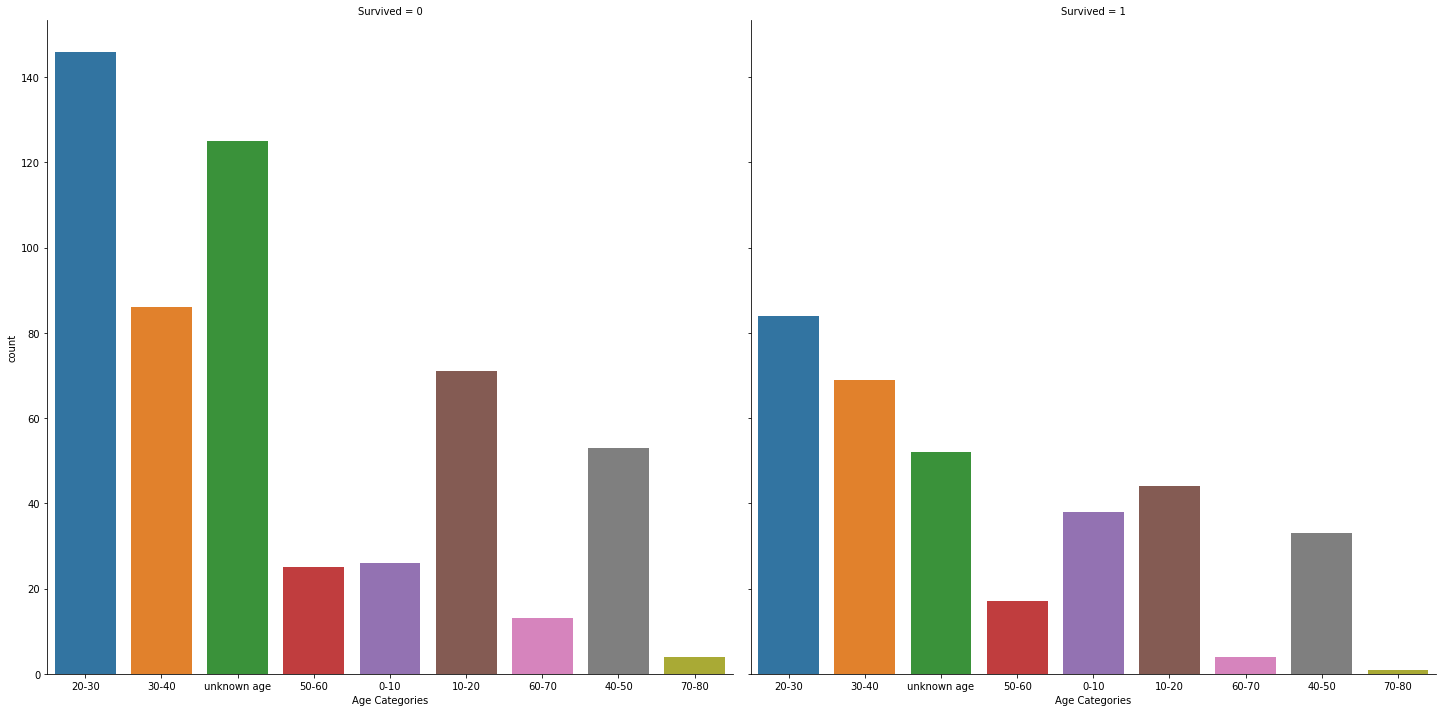

In [142]:
sns.factorplot(x='Age Categories', data=new_age_categories_clean_df, col='Survived', kind='count', size=10)

In [143]:
new_age_categories_clean_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-40
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,unknown age
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10-20


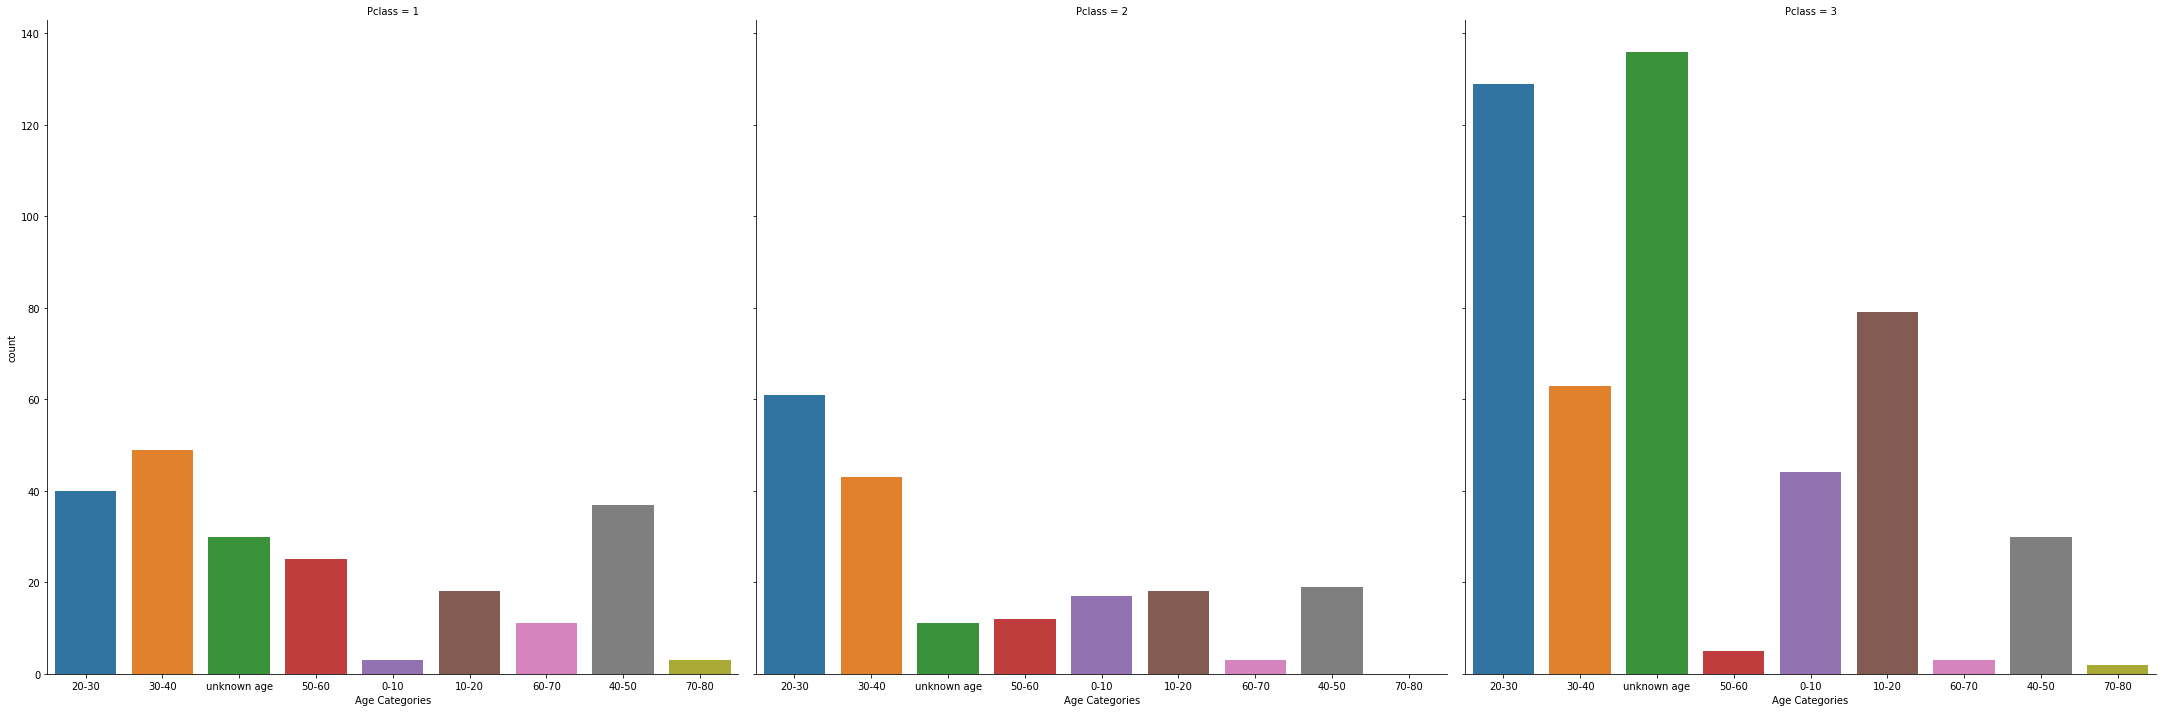

In [153]:
sns.factorplot(x='Age Categories', data=new_age_categories_clean_df, col='Pclass', kind='count', size=10)